In [1]:
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

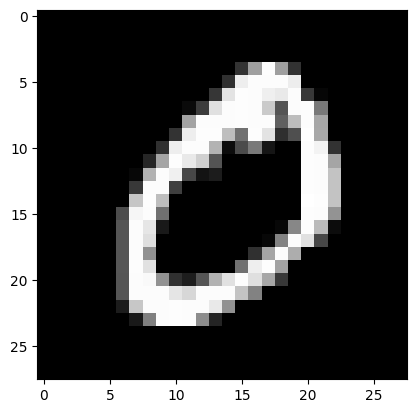

In [3]:
single_image = pixel_values[1, :].reshape(28, 28)

plt.imshow(single_image, cmap='gray')

In [4]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [8]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [9]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


/home/sm634/miniconda3/envs/ml_env/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


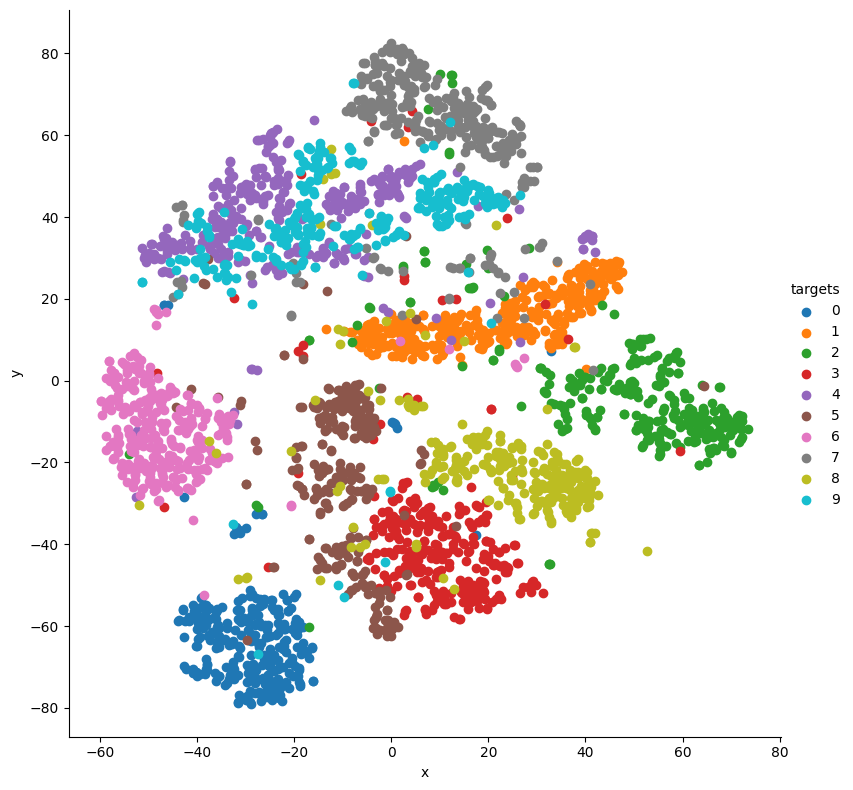

In [10]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)

grid.map(plt.scatter, "x", "y").add_legend()

#### Cross-validation
Using the redwine quality dataset.

In [31]:
wine_df= pd.read_csv('/home/sm634/projects/approachingalmost/data/winequality-red.csv')

In [32]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We can treat this problem as classification or regression problem. But for simplicty, let's do classification.

In [33]:
print(wine_df.quality.unique()) # there are only 6 quality types.

[5 6 7 4 8 3]


In [34]:
# a mapping dictionary that maps the quality values from 0 to 5.
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

In [35]:
# use the map function of pandas with any dictionary to convert the values in a given column to values in the dictionary.
wine_df.loc[:, "quality"] = wine_df.quality.map(quality_mapping)
print(wine_df.quality.unique())

[2 3 4 1 5 0]


In [36]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


##### Splitting the dataset into train and separate sets.

In [41]:
# Split into 1000 samples for training and 599 separately after random shuffling and resetting index.
wine_df = wine_df.sample(frac=1).reset_index(drop=True)

# top 1000 rows selected for training.
df_train = wine_df.head(1000)

# bottom 599 values are selected for test and validation.
df_test = wine_df.tail(599)

In [55]:
# Train a decision tree model.
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class with a max_depth of 3.
clf_tree = tree.DecisionTreeClassifier(max_depth=7)

# choose the columns you want to train on.
cols = wine_df.columns.to_list()
cols.remove('quality')
print(cols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [56]:
# train the model on the provided features.
clf_tree.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [57]:
# generate predictions on the training set.
train_predictions = clf_tree.predict(df_train[cols])

# generate predictions on the test set.
test_predictions = clf_tree.predict(df_test[cols])

# calculate accuracy on training set.
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# calculate accuracy on test set.
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)


In [58]:
print(train_accuracy)
print(test_accuracy)

0.775
0.5642737896494157


In [60]:
# change max depth and try again to see how it impacts the score using a plot.
import matplotlib

In [61]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures the plot is displayed inside the notebook.
%matplotlib inline

# initialize lists to store accuracies for training and test data we start with 50% accuracy.
train_accuracies = [.50]
test_accuracies = [.50]

for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # fit the model to given features.
    clf.fit(df_train[cols], df_train.quality)
    # create train and test predictions.
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate train and test accuracies.
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

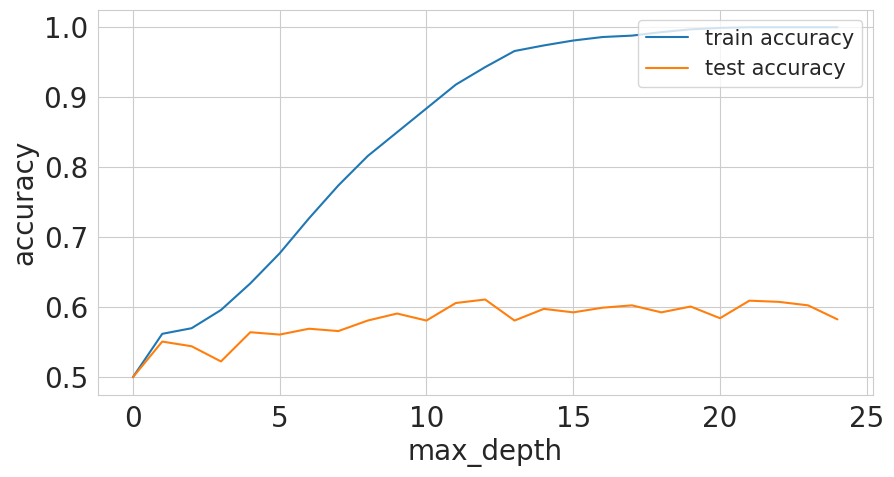

In [62]:
# create two plots using matplotlib and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper right", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()


In [64]:
%%markdown
### We See the model is overfitting.

### We See the model is overfitting.


#### k-fold validation and saving that as a new csv

In [67]:
# K-fold Validation using scikit-learn
from sklearn import model_selection

# we create a new column called kfold and fill it with -1 for the train dataset.
df_train["kfold"] = -1
# randomize the rows of the data
df_train = df_train.sample(frac=1).reset_index(drop=True)
# initiate the kfold class from the model_selection module
kf = model_selection.KFold(n_splits=5)
# fil the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df_train)):
    df_train.loc[val_, 'kfold'] = fold
# save the new csv with kfold column
df_train.to_csv('/home/sm634/projects/approachingalmost/data/winequality_train_folds.csv', index=False)

In [68]:
%%markdown
#### Stratified kfold validation (for unbalanced datasets) and saving that as winequality_train_stratified_folds.csv

#### Stratified kfold validation (for unbalanced datasets) and saving that as winequality_train_stratified_folds.csv


In [70]:
# we create a new column called kfold and fill it with -1 for the train dataset.
df_train["kfold"] = -1
# randomize the rows of the data
df_train = df_train.sample(frac=1).reset_index(drop=True)
# fetch targets
y = df_train.quality.values
# initiate the kfold class from the model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)
# fil the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df_train, y=y)):
    df_train.loc[val_, 'kfold'] = fold
# save the new csv with kfold column
df_train.to_csv('/home/sm634/projects/approachingalmost/data/winequality_train_stratified_folds.csv', index=False)

Text(0, 0.5, 'count')

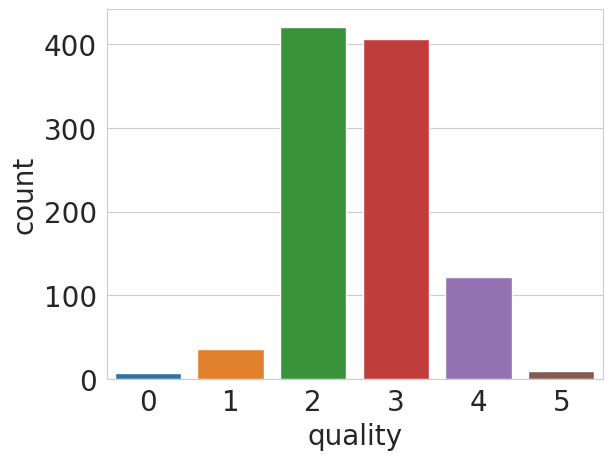

In [72]:
b = sns.countplot(x='quality', data=df_train)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

We see that the target variable is distributed in an unbalanced way.

In [73]:
%%markdown
#### Stratified k-fold for regression problems.
1) Divide the sample into bins.
2) If the number of samples isn't very great, then use 'Sturge's Rule': Num of bins = 1 + log_2_(N)

#### Stratified k-fold for regression problems.
1) Divide the sample into bins.
2) If the number of samples isn't very great, then use 'Sturge's Rule': Num of bins = 1 + log_2_(N)


In [74]:
# stratified-kfold for regression
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # we create a new column called kfold and fill it with -1.
    data["kfold"] = -1
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    # calculate the number of bins byu Sturge's rule. I take the floor of the value, you can also just round it.
    num_bins = int(np.floor(1 + np.log2(len(data))))
    # bin targets
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )
    # initiate the kfold class from model_selection module.
    kf = model_selection.StratifiedKFold(n_splits=5)
    # fill the new kfold column note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

    # drop the bins column
    data = data.drop("bins", axis=1)
    # return datafrom with folds
    return data

In [75]:
if __name__ == "__main__":
    # we create a sample dataset with 15000 samples and 100 features and 1 target
    X, y = datasets.make_regression(
        n_samples=15000, n_features=100, n_targets=1
    )
    # create a dataframe out of our numpy arrays
    df = pd.DataFrame(
        X,
        columns=[f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:, "target"] = y

    # create folds
    df = create_folds(df)

/home/sm634/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [76]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-1.423693,-1.284862,1.418043,-0.642209,0.125432,-0.865203,-1.405505,-0.173254,-0.495436,0.847484,...,-0.881018,0.005670,-0.178434,0.098557,-0.276903,-0.608660,-0.581808,-0.944637,-183.514705,0
1,-0.425399,0.281158,-2.169425,0.190655,-0.435835,1.262872,0.228865,-0.123860,0.797836,-0.406644,...,1.255608,0.378887,0.036931,0.971347,-1.587787,1.020213,-1.523997,0.971594,320.991399,0
2,-0.052414,0.131609,-1.607276,-0.829476,-2.203884,-0.639747,-0.814879,-0.005761,0.898277,0.737386,...,0.152623,-0.746555,0.435200,-0.254482,0.741675,0.170759,-0.091574,0.722326,278.500606,0
3,-1.084575,-0.176861,0.133430,-1.781053,0.132176,-1.856765,1.097452,-0.851293,-0.879677,0.346066,...,0.187775,-0.303276,0.786293,0.031751,0.008837,-0.214950,0.051900,-0.710135,13.851463,0
4,0.810678,-1.063958,-0.140491,0.557535,-0.678601,-0.758457,0.181843,0.709438,2.256822,0.748788,...,0.516062,-0.091888,-0.023729,-2.750828,-0.955031,-1.584822,1.225548,2.242626,-150.871984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-1.195417,-0.133069,0.516242,-0.403699,-0.029837,1.709576,-0.966636,-0.466721,0.174687,-0.307551,...,0.148114,-0.403571,-2.191219,0.329832,-1.917258,2.607818,-2.769276,-0.031661,-100.444457,4
14996,-0.690278,0.945107,0.533333,1.184007,0.620986,-0.098830,1.679005,0.785180,-0.649943,0.896604,...,1.231954,-1.060542,2.646826,0.650833,-0.792279,-0.362677,-0.717403,1.865687,212.473604,4
14997,0.070891,-0.301604,-1.895869,0.944426,-1.056363,0.044163,0.621622,-0.894735,0.097479,0.144126,...,0.660782,1.452491,1.549526,-0.537898,-0.559833,0.071760,2.326983,0.355098,395.120745,4
14998,2.072675,-1.791724,-0.865667,1.404810,0.321364,-0.773757,-1.153703,-1.481251,1.630003,1.240283,...,-0.024278,-1.692872,-0.785467,-0.060276,0.391807,-0.169855,-0.939189,-1.236509,345.190324,4
